# 4. Training Classifier

In [2]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#Try different classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:

# Dataframe
path_df = "Data/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "Data/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "Data/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "Data/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "Data/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [4]:
print(features_train.shape)
print(features_test.shape)

(1891, 300)
(334, 300)


In [5]:
models = {1:'Logistic Regression',
          2:'Multinomial Naive Bayes', 
          3:'K Nearest Neighbour', 
          4:'Support Vector Machines', 
          5:'Random Forest'}

## Cross-Validation for Hyperparameter Tuning

In [5]:
# Pilihan jenis classifier. Untuk selain nomor 1, maka perlu penyesuaian di bagian Random Search dan Grid Search.

choice = 1

if choice == 1:
    classifier = LogisticRegression(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==2:
    classifier = MultinomialNB()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    print(classifier)
elif choice==3:
    classifier =KNeighborsClassifier()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==4:
    classifier =svm.SVC(random_state=8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==5:
    classifier = RandomForestClassifier(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())

Parameters currently in use in Logistic Regression:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


### Randomized Search Cross Validation

Cari parameter yang secara random menggunakan cross validation.

In [6]:
if choice == 1:
    # Create the random grid logistic regression
    random_grid = {'C': [float(x) for x in np.linspace(start = 0.1, stop = 1.9, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
               'class_weight': ['balanced', None],
               'penalty': ['l2']}
elif choice==2:
    pass
elif choice==3:
    pass
elif choice==4:
    # Create the random grid SVM
    random_grid = {'C': [.0001, .001, .01],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': [.0001, .001, .01, .1, 1, 10, 100],
                  'degree': [1, 2, 3, 4, 5],
                  'probability': [True]
                 }
elif choice==5:
    # Create the random grid Random Forest
    random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [20, 40, 60, 80, 100, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }
    
pprint(random_grid)

{'C': [0.1,
       0.3,
       0.5,
       0.7,
       0.8999999999999999,
       1.0999999999999999,
       1.3,
       1.5,
       1.7,
       1.9],
 'class_weight': ['balanced', None],
 'multi_class': ['multinomial'],
 'penalty': ['l2'],
 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}


In [7]:
# Definition of the random search
random_search = RandomizedSearchCV(estimator=classifier,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   36.2s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=8,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'C': [0.1, 0.3, 0.5, 0.7,
                                              0.8999999999999999,
                                              1.0999999999999999, 1.3, 1.5, 1.7,
                                              1.9],
                   

In [8]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'class_weight': 'balanced', 'C': 1.9}

The mean accuracy of a model with these hyperparameters is:
0.9587527985309285


### Grid Search Cross Validation

Kemudian lanjutkan pencarian yang lebih detil terhadap daerah nilai terbaik hasil random search di atas.

In [9]:

# Create the parameter grid based on the results of random search 
param_grid = {'C': [float(x) for x in np.linspace(start = 0.6, stop = 1.5, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['sag'],
               'class_weight': ['balanced']}

# Create a base model
classifier = LogisticRegression(random_state=8)

In [10]:
# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   10.5s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=8, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002,
                               1.3, 1.4, 1.5],
                         'class_weight': ['balanced'],
                         'multi_class': ['multinomial'], 'solver': ['sag']},
          

In [11]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'C': 1.4, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'sag'}

The mean accuracy of a model with these hyperparameters is:
0.9696000000000001


In [12]:
best_classifier = grid_search.best_estimator_

best_classifier

LogisticRegression(C=1.4, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

### Model fit and performance

In [13]:
best_classifier.fit(features_train, labels_train)

LogisticRegression(C=1.4, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [14]:
classifier_pred = best_classifier.predict(features_test)

In [15]:
d = {
     'Model': 'Logistic Regression',
     'Training Set Accuracy': accuracy_score(labels_train, best_classifier.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, classifier_pred)
}

df_models = pd.DataFrame(d, index=[0])
df_models

,Model,Training Set Accuracy,Test Set Accuracy
0,Logistic Regression,0.985722,0.94012


In [16]:
# Classification report
print("Classification report")
print(classification_report(labels_test,classifier_pred))

Classification report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        81
           1       0.90      0.96      0.93        49
           2       0.96      0.89      0.92        72
           3       0.99      0.99      0.99        72
           4       0.93      0.92      0.92        60

    accuracy                           0.94       334
   macro avg       0.94      0.94      0.94       334
weighted avg       0.94      0.94      0.94       334



### Confusion Matrix

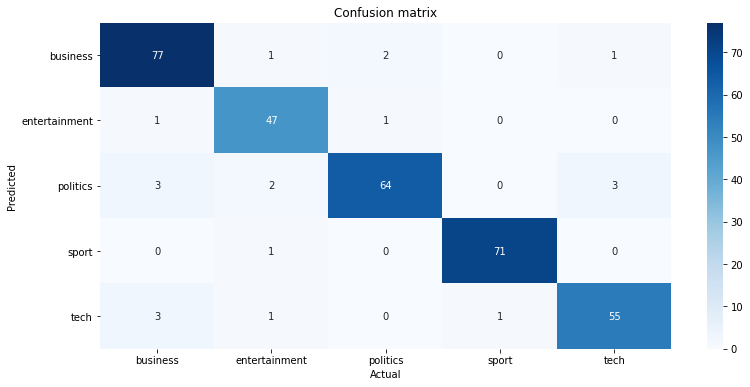

In [17]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

Bandingkan performansi dengan base model, yaitu model dengan parameter default.

In [18]:
base_model = LogisticRegression(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.9401197604790419

In [19]:
best_classifier.fit(features_train, labels_train)
accuracy_score(labels_test, best_classifier.predict(features_test))

0.9401197604790419

# Latihan

1. Ubah format penyimpanan data ke CSV
2. Coba buatkan feature berikut (save dan upload feature), lalu laporkan pengaruhnya terhadap akurasi klasifikasi:
    a. Tanpa proses normalisation
    b. Tanpa proses lemmatisation
    c. Tanpa menghilangkan stopwords
3. Coba buat tfidf dengan nilai "max_features" yang berbeda-beda (lebih besar dan lebih kecil dari 300), lalu laporkan pengaruhnya terhadap akurasi klasifikasi.
4. Coba dengan beberapa algoritma klasifikasi yang berbeda (minimal 2 algoritma), carilah parameter terbaik (jelaskan nilai2 parameter yang telah dicoba untuk tiap jenis algoritma).
5. Jika anda ingin menggunakan teks bahasa Indonesia, bagian mana saja yang perlu dilakukan penyesuaian?
6. Opsional: Gunakan word embedding (e.g word2vec, GloVe).

# Jawaban

Jawaban ditulis dalam sebuah laporan singkat format pdf

In [9]:
import base64
import csv
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

In [21]:
def writePickleToCsv(csv_path, pickle_path):
    panda_df = pd.read_pickle(pickle_path)
    try:
        panda_df.to_csv(csv_path, sep=';',index=False, encoding='utf-8')
    except:
        new_panda_df = pd.DataFrame(panda_df)
        new_panda_df.to_csv(csv_path, sep=';',index=False, encoding='utf-8')

In [22]:
# Dataframe to csv (df)
path_df_csv = "Data/df.csv"
writePickleToCsv(path_df_csv,path_df)

# # features_train to csv (features_train)
path_features_train_csv = "Data/features_train.csv"
writePickleToCsv(path_features_train_csv,path_features_train)

# labels_train to csv (labels_train)
path_labels_train_csv = "Data/labels_train.csv"
writePickleToCsv(path_labels_train_csv,path_labels_train)


# features_test to csv (features_test)
path_features_test_csv = "Data/features_test.csv"
writePickleToCsv(path_features_test_csv,path_features_test)


# labels_test to csv (labels_test)
path_labels_test_csv = "Data/labels_test.csv"
writePickleToCsv(path_labels_test_csv,path_labels_test)

In [10]:
# download some library

# Downloading punkt and wordnet from NLTK
nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')

# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()

# Downloading the stop words list
nltk.download('stopwords')

# Loading the stop words in english
stop_words = list(stopwords.words('english'))

------------------------------------------------------------


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\razeluxe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\razeluxe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\razeluxe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# lemmilized text list method
def lemillizedTextList(dataframe, content_key):
    nrows = len(dataframe)
    lemmatized_text_list = []

    for row in range(0, nrows):

        # Create an empty list containing lemmatized words
        lemmatized_list = []

        # Save the text and its words into an object
        text = dataframe.loc[row][content_key]
        text_words = text.split(" ")

        # Iterate through every word to lemmatize
        for word in text_words:
            lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))

        # Join the list
        lemmatized_text = " ".join(lemmatized_list)

        # Append to the list containing the texts
        lemmatized_text_list.append(lemmatized_text)
        
    return lemmatized_text_list

In [27]:
# feature without normalisation (wn)
df_wn = df

# lemillized process
df_wn['Content_Parsed_5'] = lemillizedTextList(df_wn,'Content')

# stopword process
df_wn['Content_Parsed_6'] = df_wn['Content_Parsed_5']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df_wn['Content_Parsed_6'] = df_wn['Content_Parsed_6'].str.replace(regex_stopword, '')

# reformat list
list_columns = ["File_Name", "Category", "Content", "Content_Parsed_6"]
df_wn = df_wn[list_columns]

df_wn = df_wn.rename(columns={'Content_Parsed_6': 'Content_Parsed'})

# labeling 
category_codes = {
    'business': 0,
    'entertainment': 1,
    'politics': 2,
    'sport': 3,
    'tech': 4
}

# Category mapping
df_wn['Category_Code'] = df_wn['Category']
df_wn = df_wn.replace({'Category_Code':category_codes})

# Split Data to train and test
X_train, X_test, y_train, y_test = train_test_split(df_wn['Content_Parsed'], 
                                                    df_wn['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=8)
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

# create tfId
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

# define feature train
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train

# define feature test
features_test = tfidf.transform(X_test).toarray()
labels_test = y_test

# define unigram and bigram
for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

print("Bigram : ")
print(bigrams)

# Saved output 
# X_train
filename = 'Data/WN/X_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(X_train, output)
    
# X_test    
filename = 'Data/WN/X_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
filename = 'Data/WN/y_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
filename = 'Data/WN/y_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(y_test, output)
    
# df
filename = 'Data/WN/df_wn.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(df_wn, output)
    
# features_train
filename = 'Data/WN/features_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(features_train, output)

# labels_train
filename = 'Data/WN/labels_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
filename = 'Data/WN/features_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(features_test, output)

# labels_test
filename = 'Data/WN/labels_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(labels_test, output)
    
# TF-IDF object
filename = 'Data/WN/tfidf.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(tfidf, output)

# 'business' category:
  . Most correlated unigrams:
. market
. bank
. firm
. economy
. growth
  . Most correlated bigrams:
. last year
. year old

# 'entertainment' category:
  . Most correlated unigrams:
. TV
. best
. award
. star
. film
  . Most correlated bigrams:
. tell BBC
. Mr Blair

# 'politics' category:
  . Most correlated unigrams:
. minister
. party
. Blair
. election
. Labour
  . Most correlated bigrams:
. tell BBC
. Mr Blair

# 'sport' category:
  . Most correlated unigrams:
. club
. side
. game
. team
. match
  . Most correlated bigrams:
. say Mr
. year old

# 'tech' category:
  . Most correlated unigrams:
. Microsoft
. computer
. software
. technology
. users
  . Most correlated bigrams:
. year old
. say Mr

Bigram : 
['tell BBC', 'said The', 'last year', 'Mr Blair', 'year old', 'say Mr']


In [28]:
# feature without lemmatisation (wl)
df_wl = df

# normalisation process
df_wl['Content_Parsed_1'] = df_wl['Content'].str.replace("\r", " ")
df_wl['Content_Parsed_1'] = df_wl['Content_Parsed_1'].str.replace("\n", " ")
df_wl['Content_Parsed_1'] = df_wl['Content_Parsed_1'].str.replace("    ", " ")
df_wl['Content_Parsed_1'] = df_wl['Content_Parsed_1'].str.replace('"', '')
df_wl['Content_Parsed_2'] = df_wl['Content_Parsed_1'].str.lower()
punctuation_signs = list("?:!.,;")
df_wl['Content_Parsed_3'] = df_wl['Content_Parsed_2']
for punct_sign in punctuation_signs:
    df_wl['Content_Parsed_3'] = df_wl['Content_Parsed_3'].str.replace(punct_sign, '')
df_wl['Content_Parsed_4'] = df_wl['Content_Parsed_3'].str.replace("'s", "")

# stopword process
df_wl['Content_Parsed_6'] = df_wl['Content_Parsed_4']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df_wl['Content_Parsed_6'] = df_wl['Content_Parsed_6'].str.replace(regex_stopword, '')

# reformat list
list_columns = ["File_Name", "Category", "Content", "Content_Parsed_6"]
df_wl = df_wl[list_columns]

df_wl = df_wl.rename(columns={'Content_Parsed_6': 'Content_Parsed'})

# labeling 
category_codes = {
    'business': 0,
    'entertainment': 1,
    'politics': 2,
    'sport': 3,
    'tech': 4
}

# Category mapping
df_wl['Category_Code'] = df_wl['Category']
df_wl = df_wl.replace({'Category_Code':category_codes})

# Split Data to train and test
X_train, X_test, y_train, y_test = train_test_split(df_wl['Content_Parsed'], 
                                                    df_wl['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=8)
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

# create tfId
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

# define feature train
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train

# define feature test
features_test = tfidf.transform(X_test).toarray()
labels_test = y_test

# define unigram and bigram
for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

print("Bigram : ")
print(bigrams)
    
# Saved output 
# X_train
filename = 'Data/WL/X_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(X_train, output)
    
# X_test    
filename = 'Data/WL/X_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
filename = 'Data/WL/y_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
filename = 'Data/WL/y_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(y_test, output)
    
# df
filename = 'Data/WL/df_wl.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(df_wl, output)
    
# features_train
filename = 'Data/WL/features_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(features_train, output)

# labels_train
filename = 'Data/WL/labels_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
filename = 'Data/WL/features_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(features_test, output)

# labels_test
filename = 'Data/WL/labels_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(labels_test, output)
    
# TF-IDF object
filename = 'Data/WL/tfidf.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(tfidf, output)

# 'business' category:
  . Most correlated unigrams:
. prices
. economy
. bank
. growth
. oil
  . Most correlated bigrams:
. last year
. year old

# 'entertainment' category:
  . Most correlated unigrams:
. films
. star
. award
. awards
. film
  . Most correlated bigrams:
. mr blair
. prime minister

# 'politics' category:
  . Most correlated unigrams:
. tory
. blair
. election
. party
. labour
  . Most correlated bigrams:
. prime minister
. mr blair

# 'sport' category:
  . Most correlated unigrams:
. side
. game
. season
. match
. cup
  . Most correlated bigrams:
. said mr
. year old

# 'tech' category:
  . Most correlated unigrams:
. digital
. technology
. computer
. software
. users
  . Most correlated bigrams:
. year old
. said mr

Bigram : 
['told bbc', 'last year', 'mr brown', 'prime minister', 'mr blair', 'year old', 'said mr']


In [29]:
# feature without stopwords (ws)
df_ws = df

# normalisation process
df_ws['Content_Parsed_1'] = df_ws['Content'].str.replace("\r", " ")
df_ws['Content_Parsed_1'] = df_ws['Content_Parsed_1'].str.replace("\n", " ")
df_ws['Content_Parsed_1'] = df_ws['Content_Parsed_1'].str.replace("    ", " ")
df_ws['Content_Parsed_1'] = df_ws['Content_Parsed_1'].str.replace('"', '')
df_ws['Content_Parsed_2'] = df_ws['Content_Parsed_1'].str.lower()
punctuation_signs = list("?:!.,;")
df_ws['Content_Parsed_3'] = df_ws['Content_Parsed_2']
for punct_sign in punctuation_signs:
    df_ws['Content_Parsed_3'] = df_ws['Content_Parsed_3'].str.replace(punct_sign, '')
df_ws['Content_Parsed_4'] = df_ws['Content_Parsed_3'].str.replace("'s", "")

# lemillized process
df_ws['Content_Parsed_5'] = lemillizedTextList(df_ws,'Content_Parsed_4')

# reformat list
list_columns = ["File_Name", "Category", "Content", "Content_Parsed_5"]
df_ws = df_ws[list_columns]

df_ws = df_ws.rename(columns={'Content_Parsed_5': 'Content_Parsed'})


# labeling 
category_codes = {
    'business': 0,
    'entertainment': 1,
    'politics': 2,
    'sport': 3,
    'tech': 4
}

# Category mapping
df_ws['Category_Code'] = df_ws['Category']
df_ws = df_ws.replace({'Category_Code':category_codes})

# Split Data to train and test
X_train, X_test, y_train, y_test = train_test_split(df_ws['Content_Parsed'], 
                                                    df_ws['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=8)
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

# create tfId
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

# define feature train
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train

# define feature test
features_test = tfidf.transform(X_test).toarray()
labels_test = y_test

# define unigram and bigram
for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")
   
print("Bigram : ")
print(bigrams)

# Saved output 
# X_train
filename = 'Data/WS/X_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(X_train, output)
    
# X_test    
filename = 'Data/WS/X_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
filename = 'Data/WS/y_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
filename = 'Data/WS/y_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(y_test, output)
    
# df
filename = 'Data/WS/df_ws.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(df_ws, output)
    
# features_train
filename = 'Data/WS/features_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(features_train, output)

# labels_train
filename = 'Data/WS/labels_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
filename = 'Data/WS/features_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(features_test, output)

# labels_test
filename = 'Data/WS/labels_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(labels_test, output)
    
# TF-IDF object
filename = 'Data/WS/tfidf.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(tfidf, output)

# 'business' category:
  . Most correlated unigrams:
. market
. price
. economy
. growth
. bank
  . Most correlated bigrams:
. he be
. the us

# 'entertainment' category:
  . Most correlated unigrams:
. music
. best
. star
. award
. film
  . Most correlated bigrams:
. that the
. the government

# 'politics' category:
  . Most correlated unigrams:
. minister
. party
. blair
. election
. labour
  . Most correlated bigrams:
. say he
. the government

# 'sport' category:
  . Most correlated unigrams:
. players
. england
. win
. game
. team
  . Most correlated bigrams:
. the government
. the uk

# 'tech' category:
  . Most correlated unigrams:
. net
. phone
. mobile
. digital
. technology
  . Most correlated bigrams:
. the government
. such as

Bigram : 
['go to', 'but the', 'the first', 'be in', 'would be', 'and the', 'say the', 'have be', 'to the', 'be to', 'from the', 'say it', 'over the', 'have to', 'of the', 'on the', 'in the', 'for the', 'he say', 'we be', 'the world', 'the us', 'be t

In [30]:
# TFIDF Small (tfidf_s)
df_s = df

# labeling 
category_codes = {
    'business': 0,
    'entertainment': 1,
    'politics': 2,
    'sport': 3,
    'tech': 4
}

# Category mapping
df_s['Category_Code'] = df_s['Category']
df_s = df_s.replace({'Category_Code':category_codes})

# Split Data to train and test
X_train, X_test, y_train, y_test = train_test_split(df_s['Content_Parsed'], 
                                                    df_s['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=8)
# Parameter election with 200 max features
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 200

# create tfId
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

# define feature train
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train

# define feature test
features_test = tfidf.transform(X_test).toarray()
labels_test = y_test

# define unigram and bigram
for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

print("Bigram : ")
print(bigrams)

# Saved output 
# X_train
filename = 'Data/TFIDFS/X_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(X_train, output)
    
# X_test    
filename = 'Data/TFIDFS/X_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
filename = 'Data/TFIDFS/y_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
filename = 'Data/TFIDFS/y_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(y_test, output)
    
# df
filename = 'Data/TFIDFS/df_s.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(df_s, output)
    
# features_train
filename = 'Data/TFIDFS/features_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(features_train, output)

# labels_train
filename = 'Data/TFIDFS/labels_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
filename = 'Data/TFIDFS/features_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(features_test, output)

# labels_test
filename = 'Data/TFIDFS/labels_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(labels_test, output)
    
# TF-IDF object
filename = 'Data/TFIDFS/tfidf.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(tfidf, output)

# 'business' category:
  . Most correlated unigrams:
. price
. market
. economy
. growth
. bank
  . Most correlated bigrams:
. say mr
. last year

# 'entertainment' category:
  . Most correlated unigrams:
. tv
. music
. star
. award
. film
  . Most correlated bigrams:
. last year
. say mr

# 'politics' category:
  . Most correlated unigrams:
. minister
. election
. blair
. party
. labour
  . Most correlated bigrams:
. last year
. say mr

# 'sport' category:
  . Most correlated unigrams:
. win
. side
. game
. team
. match
  . Most correlated bigrams:
. last year
. say mr

# 'tech' category:
  . Most correlated unigrams:
. mobile
. digital
. technology
. software
. users
  . Most correlated bigrams:
. last year
. say mr

Bigram : 
['last year', 'say mr']


In [31]:
# TFIDF High (tfidf_h)
df_h = df

# labeling 
category_codes = {
    'business': 0,
    'entertainment': 1,
    'politics': 2,
    'sport': 3,
    'tech': 4
}

# Category mapping
df_h['Category_Code'] = df_h['Category']
df_h = df_h.replace({'Category_Code':category_codes})

# Split Data to train and test
X_train, X_test, y_train, y_test = train_test_split(df_h['Content_Parsed'], 
                                                    df_h['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=8)
# Parameter election with 400 max features
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 400

# create tfId
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

# define feature train
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train

# define feature test
features_test = tfidf.transform(X_test).toarray()
labels_test = y_test

# define unigram and bigram
for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")
    
print("Bigram : ")
print(bigrams)

# Saved output 
# X_train
filename = 'Data/TFIDFH/X_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(X_train, output)
    
# X_test    
filename = 'Data/TFIDFH/X_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
filename = 'Data/TFIDFH/y_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
filename = 'Data/TFIDFH/y_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(y_test, output)
    
# df
filename = 'Data/TFIDFH/df_h.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(df_h, output)
    
# features_train
filename = 'Data/TFIDFH/features_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(features_train, output)

# labels_train
filename = 'Data/TFIDFH/labels_train.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
filename = 'Data/TFIDFH/features_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(features_test, output)

# labels_test
filename = 'Data/TFIDFH/labels_test.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(labels_test, output)
    
# TF-IDF object
filename = 'Data/TFIDFH/tfidf.pickle'
os.makedirs(os.path.dirname(filename), exist_ok=True)
with open(filename, 'wb') as output:
    pickle.dump(tfidf, output)

# 'business' category:
  . Most correlated unigrams:
. firm
. economy
. growth
. oil
. bank
  . Most correlated bigrams:
. last year
. year old

# 'entertainment' category:
  . Most correlated unigrams:
. music
. band
. star
. award
. film
  . Most correlated bigrams:
. mr blair
. prime minister

# 'politics' category:
  . Most correlated unigrams:
. tory
. blair
. party
. election
. labour
  . Most correlated bigrams:
. prime minister
. mr blair

# 'sport' category:
  . Most correlated unigrams:
. season
. champion
. cup
. coach
. match
  . Most correlated bigrams:
. say mr
. year old

# 'tech' category:
  . Most correlated unigrams:
. digital
. technology
. computer
. software
. users
  . Most correlated bigrams:
. year old
. say mr

Bigram : 
['tell bbc', 'last year', 'mr brown', 'prime minister', 'mr blair', 'year old', 'say mr']


In [32]:
# Algoritma Multinomial Naive Bayes (model 2)
choice = 2

# Cross Validation
classifier = MultinomialNB()

print('Parameters currently in use in {}:\n'.format(models[choice]))
pprint(classifier)

# Create the parameter grid based on the results of random search 
param_grid = {'alpha': [float(x) for x in np.linspace(start = 0.1, stop = 1.0, num = 10)],
               'class_prior': [None],
               'fit_prior': [True, False]}

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

# Result Tunning param using Grid Search
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

Parameters currently in use in Multinomial Naive Bayes:

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best hyperparameters from Grid Search are:
{'alpha': 0.1, 'class_prior': None, 'fit_prior': False}

The mean accuracy of a model with these hyperparameters is:
0.9573333333333333


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


In [35]:
# Algoritma K Nearest Neighbour (model 3)
choice = 3

classifier = KNeighborsClassifier()

print('Parameters currently in use in {}:\n'.format(models[choice]))
pprint(classifier.get_params())

# Create the parameter grid based on the results of random search 
param_grid = {
    'leaf_size' : [10,20,30,40,50,60],
    'n_neighbors' : [5,10,20,30,40,50],
    'p' : [1,2]
}



# Create a base model
classifier = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

# Result Tunning param using Grid Search
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

Parameters currently in use in K Nearest Neighbour:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}
Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:  3.5min finished


The best hyperparameters from Grid Search are:
{'leaf_size': 10, 'n_neighbors': 5, 'p': 2}

The mean accuracy of a model with these hyperparameters is:
0.9578666666666668


In [36]:
# Algoritma Support Vector Machines (model 4)
choice = 4

classifier = svm.SVC(random_state=8)

print('Parameters currently in use in {}:\n'.format(models[choice]))
pprint(classifier.get_params())

# Create the random grid SVM
random_grid = {'C': [.0001, .001, .01],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': [.0001, .001, .01, .1, 1, 10, 100],
              'degree': [1, 2, 3, 4, 5]
             }

pprint(random_grid)


# Definition of the random search
random_search = RandomizedSearchCV(estimator=classifier,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

# Result Tunning param using Random Search
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

# Create the parameter grid based on the results of random search 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
               'kernel': ['rbf','linear','poly','sigmoid'],
               'gamma' : [1,0.1,0.01,0.001]}

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

# Result Tunning param using Grid Search
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

Parameters currently in use in Support Vector Machines:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}
{'C': [0.0001, 0.001, 0.01],
 'degree': [1, 2, 3, 4, 5],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf', 'poly']}
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  4.6min finished


The best hyperparameters from Random Search are:
{'kernel': 'poly', 'gamma': 10, 'degree': 4, 'C': 0.01}

The mean accuracy of a model with these hyperparameters is:
0.9201502611962201
Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  6.4min finished


The best hyperparameters from Grid Search are:
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

The mean accuracy of a model with these hyperparameters is:
0.9722666666666666


In [6]:
# Algoritma Random Forest (model 5)
choice = 5

classifier = RandomForestClassifier(random_state = 8)
print('Parameters currently in use in {}:\n'.format(models[choice]))
pprint(classifier.get_params())

# Create the random grid Random Forest
random_grid = {'n_estimators': [50, 100, 150, 200],
           'max_features': ['auto', 'sqrt'],
           'max_depth': [20, 40, 60, None],
           'min_samples_split': [2, 5],
           'min_samples_leaf': [1, 4],
           'bootstrap': [True, False]}
    
pprint(random_grid)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=classifier,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

# Result Tunning param using Random Search
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

# parameter
# Number of trees in random forest
n_estimators = [50, 100, 150, 200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [20, 40, 60, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4]
# Method of selecting samples for training each tree
bootstrap = [False, True]

# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Create a base model
classifier = RandomForestClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

# Result Tunning param using Grid Search
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

Parameters currently in use in Random Forest:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}
{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [50, 100, 150, 200]}
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.9min finished


The best hyperparameters from Random Search are:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.9423590672402083
Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 768 out of 768 | elapsed: 15.4min finished


The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

The mean accuracy of a model with these hyperparameters is:
0.9429333333333333


In [12]:
# Loading the stop words in indonesia
# stop_words_id = list(stopwords.words('indonesia'))